## 14. 순환신경망 ##
### 14.1 순환뉴런 ###

![RNN1](images/rnn1.png)

<center><b style="font-size : 1.2em">순환 뉴런 & 타임 스텝으로 펼친 뉴런</b></center>

![RNN2](images/rnn2.png)

<center><b style="font-size : 1.2em">순환 뉴런의 층 & 타입 스텝으로 펼쳐진 층</b></center>

각 순환 뉴런은 두 개의 가중치 $\mathbf{w}_{x}$ 와 $\mathbf{w}_{y}$ 를 가지는데, $\mathbf{w}_{x}$ 는 $\mathbf{x}_{t}$ 를 위한 것이고 $\mathbf{w}_{y}$는 이전 타임 스텝의 출력 $\mathbf{y}_{t-1}$을 위한 것이다. 이것을 순환 층(layer) 전체로 생각하면 가중치 벡터 $\mathbf{w}_{x}$ 와 $\mathbf{w}_{y}$ 를 행렬 $\mathbf{W}_{x}$ 와 $\mathbf{W}_{y}$ 로 나타낼 수 있으며 다음의 식과 같이 표현할 수 있다.

$$
\mathbf{y}_{t} = \phi \left( \mathbf{W}_{x}^{T}\cdot\mathbf{x}_{t} + \mathbf{W}_{y}^{T} \cdot\mathbf{y}_{t-1} + \mathbf{b} \right)
$$

<br>

그리고 타임 스텝 $t$ 에서의 미니배치(mini-batch)의 입력을 행렬 $\mathbf{X}_{t}$ 로 나타내어 아래와 같이 순환 층의 출력을 한번에 계산할 수 있다.

$$
\mathbf{Y}_{t}= \phi \left( \mathbf{X}_{t} \cdot \mathbf{W}_{x} + \mathbf{Y}_{t-1} \cdot \mathbf{W}_{y} + \mathbf{b} \right)
$$

$$
= \phi \left( \begin{bmatrix} \mathbf{X}_{t} \mathbf{Y}_{t-1} \end{bmatrix}\begin{bmatrix} \mathbf{W}_{x} \\ \mathbf{W}_{y} \end{bmatrix} + \mathbf{b} \right)
$$

$$
여기서 W = \begin{bmatrix} \mathbf{W}_{x} \\ \mathbf{W}_{y} \end{bmatrix}
$$



$\phi$는 활성화 함수이다, RNN에서의 활성화 함수로는 $\tanh$ 가 주로 사용된다


<br/>

<ul>
<li>$\mathbf{Y}_{t}$ : 타임 스텝 $t$에서 미니배치에 있는 각 샘플(미니배치)에 대한 순환 층의 출력이며, <b style="color:red; font-size:1.1em">$m \times n_{\text{neurons}}$</b> 행렬($m$은 미니배치, $n_{\text{neurons}}$은 뉴런 수), <b style="background-color:#00C500">각 뉴런별로 출력값이 나오기때문에 샘플의 수 X 뉴런의 수</b></li>
<li>$\mathbf{X}_{t}$ : 모든 샘플의 입력값을 담고 있는 <b style="color:red; font-size:1.1em">$m \times n_{\text{inputs}}$</b> 행렬 ($n_{\text{inputs}}$은 입력 특성 수)</li>
<li>$\mathbf{W}_{x}$ : 현재 타임 스텝 $t$의 입력에 대한 가중치를 담고 있는 <b style="color:red; font-size:1.1em">$n_{\text{inputs}} \times n_{\text{neurons}}$</b> 행렬</li>
<li>$\mathbf{W}_{y}$ : 이전 타임 스텝 $t-1$ 의 출력에 대한 가중치를 담고 있는 <b style="color:red; font-size:1.1em">$n_{\text{neurons}} \times n_{\text{neurons}}$</b> 행렬</li>
<li>$\mathbf{b}$ : 각 뉴런의 편향(bias)을 담고 있는 $n_{\text{neurons}}$ 크기의 벡터</li>
<li>$\begin{bmatrix} \mathbf{X}_{t} \mathbf{Y}_{t-1} \end{bmatrix}$는 $\mathbf{X}_{t}\mathbf{Y}_{t-1}$을 수평적으로 연결한다는 것을 의미</li>
</ul>
위의 식에서 $\mathbf{Y}_{t}$ 는 $\mathbf{X}_t$ 와 $\mathbf{Y}_{t-1}$의 함수이므로, 타임 스텝 $t=0$ 에서부터 모든 입력에 대한 함수가 된다. 첫 번째 타임 스텝인 $t=0$ 에서는 이전의 출력이 없기 때문에 일반적으로 $0$으로 초기화 한다.

### 입력과 출력 시퀀스 ###

![RNN4](images/rnn4.png)


<ul>
    <li><p><b>Vector to Sequence</b> : 첫 번째 타임 스텝에서 단 하나의 입력만 네트워크에 주입하고(다른 모든 타임 스텝에서는 0 주입) 출력시퀀스 연결, 예)이미지 캡션 출력</p></li>
    <li><p><b>Sequence to Vector</b> : 입력시퀀스를 네트워크에 주입하고, 마지막을 제외한 모든 출력을 무시, 예)감성점수 출력</p></li>
    <li><p><b>Sequence to Sequence</b> : 입력시퀀스를 받아 출력시퀀스를 만듬, 예)주식가격 예측</p></li>
    <li><p><b>Delayed Sequence to Sequence</b> : 시퀀스-투-벡터(인코더) 뒤에 벡터-투-시퀀스(디코더) 연결, 예)문장 번역</p></li>
</ul>

### 14.2 텐서플로로 기본 RNN 구성하기 ###

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [6]:
## GPU 메모리 관리 ##
#1번 방법
config = tf.ConfigProto()
config.gpu_options.allow_growth = True #메모리 수요에 따라 할당

'''주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. 

Tensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'''

'주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. \n\nTensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'

In [2]:
tf.reset_default_graph()

n_inputs = 3 #입력 특성의 개수
n_neurons = 5 #순환 뉴런층 안에 있는 뉴런의 개수

X0 = tf.placeholder(tf.float32, [None, n_inputs]) #step0에서 입력
X1 = tf.placeholder(tf.float32, [None, n_inputs]) #step1에서 입력

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32)) #입력을 위한 가중치
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32)) #출력을 위한 가중치
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32)) #편향

Y0 = tf.tanh(tf.matmul(X0, Wx) + b) #step0에서 출력
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b) #step1에서 출력

init = tf.global_variables_initializer()

In [3]:
#미니배치            샘플0      샘플1      샘플2      샘플3
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0 ,1]]) #step0에서 입력
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) #step1d에서 입력

with tf.Session() as sess:
    sess.run(init)
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)

Y0_val:(4, 5)
[[-0.43867782 -0.43493494  0.9827718   0.6052453   0.9521415 ]
 [-0.9912529  -0.9538943   0.9999988   0.9999891   0.9999992 ]
 [-0.9999011  -0.99717605  1.          1.          1.        ]
 [-0.99999964  0.9985307   0.9999456   0.99999994  0.9991321 ]]
Y1_val:(4, 5)
[[-0.99988806 -0.9071155   1.          1.          1.        ]
 [ 0.9330759   0.97311336  0.9372936   0.07363564 -0.9072335 ]
 [-0.98252815 -0.18634532  0.99999994  1.          0.9999996 ]
 [ 0.8889262   0.4370229   0.8731952   0.9993633   0.88480276]]


In [20]:
#위와 동일한 코드

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
output_seqs, states = tf.nn.static_rnn(cell=basic_cell, inputs=[X0, X1],
                                           dtype=tf.float32) #셀을 연결하여 펼쳐진 RNN네트워크를 만듬
Y0, Y1 = output_seqs #각 타임스텝에서의 출력 텐서를 담고있는 리스트, 네트워크의 최종 상태를 담고있는 텐서

#미니배치
# t = 0
X0_batch = np.array([[0, 1, 2],  # sample 0
                     [3, 4, 5],  # sample 1
                     [6, 7, 8],  # sample 2
                     [9, 0, 1]]) # sample 3
# t = 1
X1_batch = np.array([[9, 8, 7], 
                     [3, 4, 5], 
                     [6, 5, 4], 
                     [3, 2, 1]])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
    
print('Y0_val:{}\n{}'.format(Y0_val.shape, Y0_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)
print('Y1_val:{}\n{}'.format(Y1_val.shape, Y1_val))  # shape: (4, 5) → (샘플 개수, 뉴런 개수)

Y0_val:(4, 5)
[[ 0.6665392  -0.27402034 -0.14346613  0.7007153   0.5232706 ]
 [ 0.8718256  -0.96863294  0.9426004   0.3721035   0.98638576]
 [ 0.9542055  -0.9991093   0.99869287 -0.08676071  0.99969983]
 [-0.99974024 -0.9242235   0.9999719  -0.99957     0.99999136]]
Y1_val:(4, 5)
[[ 0.6852712  -0.99996364  0.99999326 -0.984032    0.9999805 ]
 [ 0.94351286 -0.98605835  0.99266964 -0.08152092  0.9966243 ]
 [ 0.6018127  -0.9986716   0.99989456 -0.9759625   0.9991661 ]
 [ 0.54286885 -0.9488012   0.986592   -0.9866974   0.75857   ]]


In [34]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2])) #입력데이터의 열을 바꾸고 하나씩 꺼냄

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs, dtype=tf.float32) #셀을 연결하여 펼쳐진 RNN네트워크를 만듬
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0 ,2]) #모든 출력을 하나의 텐서로 합침

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [3, 4, 5]], # sample 1
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

[[[-0.1105443  -0.50030005 -0.35142988  0.9068353  -0.3320599 ]
  [-0.9999975  -0.96750146 -0.6956085   0.83011717 -1.        ]]

 [[-0.9874154  -0.8828229  -0.7572333   0.9866959  -0.99804294]
  [-0.987381   -0.93349     0.52412933  0.97658026 -0.99984115]]

 [[-0.99989986 -0.9770097  -0.92350227  0.998166   -0.9999962 ]
  [-0.99985003 -0.91482174  0.6592921   0.27506992 -0.9999988 ]]

 [[-0.99841654 -0.8882804  -0.9894495  -0.99995464 -0.9999384 ]
  [-0.998729   -0.82644653  0.79904616  0.02509189 -0.99954045]]]


### static_rnn()의 문제점

<span>static_rnn() 함수의 문제는 타임 스텝마다 하나의 셀을 그래프에 추가하기 때문에, 만약 타임 스텝이 많아질 경우 그래프가 매우 복잡해진다는 것이다.</span>
<br>
<span>쉽게 말하면, for문과 같이 반복문을 쓰지않고 동일한 셀을 타임 스텝별로 만드는 것이라 할 수 있다.</span>
<br>
<span>이럴 경우 타임 스텝이 많아서 그래프가 커지게되면 역전파(backprop)시 메모리 부족(OOM, Out-Of-Memory)에러가 발생할 수 있다.</span>
    
<span>이러한 문제를 해결할 수 있는 방법으로는 tf.nn.dynamic_rnn()이 있다.</span>

## 2.2 동적으로 타임 스텝 펼치기

<p style="font-size:1.1em">tf.nn.dynamic_rnn() 함수는 적절한 타임 스텝에 걸쳐 셀을 실행하기 위해 tf.while_loop() 연산을 사용.</p>
<p style="font-size:0.9em;color:blue">tf.while_loop() 연산을 사용하면 타임 스텝의 크기에 상관없이 하나의 행렬곱 연산 tf.matmul()만 생성함</p>
<br>
<p style="font-size:1.1em">GPU메모리에서 CPU메모리로 바꾸어 역전파 시에 OOM(Out-Of-Memory)에러를 피하기 위해 tf.nn.dynamic_rnn(swap_memory=True) 설정</p>
<p style="font-size:1.1em">이 함수는 각 타임 스텝의 모든 입력에 대해 텐서 하나를 받고([None, n_steps, n_inputs]), 타임 스텝마다의 모든 출력을 하나의 텐서([None, n_steps, n_neurons])로 반환</p>
<p style="font-size:0.9em;color:blue">tf.stack, tf.unstack, tf.transpose 사용할 필요 없음!!</p>

In [40]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
#tf.stack 사용할 필요없음
#X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2])) #입력데이터의 열을 바꾸고 하나씩 꺼냄

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=True) #OOM시 메인 메모리 사용
#tf.stack, tftranspose 사용할 필요없음
#outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0 ,2]) #모든 출력을 하나의 텐서로 합침

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [3, 4, 5]], # sample 1
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val = outputs.eval(feed_dict={X: X_batch})
    
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
[[[ 0.85334516  0.8141438   0.313379   -0.69611907  0.28773725]
  [ 0.99999994  1.          0.9913502  -0.8543494   0.98387647]]

 [[ 0.99980074  0.9998129   0.86700404 -0.8867808   0.8650835 ]
  [ 0.99959165  0.999959    0.9114392  -0.97390735  0.7209359 ]]

 [[ 0.99999976  0.9999998   0.98077375 -0.9605962   0.98125607]
  [ 0.99991673  0.9999967   0.95923656 -0.76816344  0.86428374]]

 [[ 0.9999454   0.9983292  -0.8371234   0.99967825 -0.3139772 ]
  [ 0.90131366  0.9690799  -0.28888935 -0.15881321  0.7139215 ]]]


## 2.3 가변 길이 입력 시퀀스 다루기

문장같은 가변 길이 입력 시퀀스를 다루기 위해서는 <b style="background-color:#0cf">tf.nn.dynamic_rnn(sequence_length={입력 시퀀스 길이}),</b> 또는<b style="background-color:#0ca">tf.nn.static_rnn(sequence_length={입력 시퀀스 길이})</b>를 설정해야 함

In [45]:
#출력텐서 간단하게 만들기

tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
n_steps = 2

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #타임스텝별로 입력을 만드는 대신 타입스템만큼의 열을 만듬
seq_length = tf.placeholder(shape=[None], dtype=tf.float32)

# BasicRNNCell
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
# static_rnn()
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, swap_memory=True, sequence_length=seq_length) #가변길이 설정

#미니배치
X_batch = np.array([[[0, 1, 2], [9, 8, 7]], # sample 0
                     [[3, 4, 5], [0, 0, 0]], # sample 1, 모자란 부분은 0으로 채워서 길이를 맞춰줌(0으로 패딩시킴)
                     [[6, 7, 8], [6, 5, 4]], # sample 2
                     [[9, 0, 1], [3, 2, 1]]]) # sample 3
seq_length_batch = [2, 1, 2, 2] #입력데이터의 길이

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

print("-------------------- outputs_val --------------------")
print(outputs_val) # shape: (4, 2, 5) → (샘플 개수, 타임스텝 개수, 뉴런 개수)

print()

print("-------------------- states_val --------------------")
print(states_val) # shape: (4,5) → (샘플 개수, 뉴런 개수), 0벡터가 제외된 각 셀의 마지막 상태를 담음

-------------------- outputs_val --------------------
[[[ 0.1711922  -0.6476346   0.39549306  0.03427123  0.35730192]
  [ 0.9999266  -0.99998343  0.16134876 -0.99387264  0.9853087 ]]

 [[ 0.95986235 -0.9952373   0.36473402 -0.6991825   0.88534856]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9988153  -0.9999467   0.33315763 -0.9431344   0.98450124]
  [ 0.979026   -0.9992811   0.27179083 -0.9526911   0.7239816 ]]

 [[ 0.9736584  -0.99963105  0.80333865 -0.9926766  -0.85368717]
  [ 0.91740143 -0.95162207  0.2917505  -0.06991738  0.03283571]]]

-------------------- states_val --------------------
[[ 0.9999266  -0.99998343  0.16134876 -0.99387264  0.9853087 ]
 [ 0.95986235 -0.9952373   0.36473402 -0.6991825   0.88534856]
 [ 0.979026   -0.9992811   0.27179083 -0.9526911   0.7239816 ]
 [ 0.91740143 -0.95162207  0.2917505  -0.06991738  0.03283571]]


# RNN 훈련하기

## 1) BPTT(Back Propagation Through Time)

타임 스텝으로 네트워크를 펼치고 보통의 역전파를 사용하는 것


![BPTT](images/bptt1.png)

각 타임 스텝마다 같은 매개변수 $\mathbf{W}$ 와 $\mathbf{b}$ 이 사용되기 때문에 역전파가 진행되면서 모든 타임 스텝에 걸쳐 매개변수 값이 합산됨. 이렇게 업데이트된 가중치는 순전파 동안에는 모든 타임 스텝에 동일한 가중치가 적용됨.

## 2) Truncated BPTT

BPTT는 전체의 타임 스텝마다 처음부터 끝까지 역전파를 하기 때문에 타임 스텝이 클 수록 계산량이 많아지는 문제가 있다. 이러한 계산량 문제를 해결하기 위해 전체 타임 스텝을 일정 구간(예를들어 3 또는 5 구간)으로 나눠 역전파를 하는 Truncated BPTT를 사용

![BPTT2](images/bptt2.png)

하지만 truncated-BPTT의 문제는 만약 학습 데이터가 장기간에 걸쳐 패턴이 발생한다고 하면, 이러한 장기간(Long-Term)의 패턴을 학습할 수 없는 문제가 있다.

## ★ 시퀀스 분류기 훈련하기

![sc](images/seq_classifier.jpg)

<ul style="font-size:1.2em">
    <li>MNIST이미지 훈련</li>
    <li>150개의 순환뉴런으로 된 셀</li>
    <li>마지막 타임 스텝의 출력에 10개 뉴런으로 된 완전 연결 신경망 연결</li>
    <li>완전 연결 신경망에 소프트맥스 연결</li>
</ul>

In [3]:
#MNIST 데이터 로드
################
# Layer Params #
################
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x.astype(np.float32).reshape(-1, 28*28) / 255.0  # (784,)
test_x = test_x.astype(np.float32).reshape(-1, 28*28) / 255.0
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]

#28(가로크기) x 28(세로크기) x 배치크기 → 배치크기 x 28(타임스텝) x 28(입력특성의 개수)
test_x = test_x.reshape([-1, n_steps, n_inputs])
valid_x = valid_x.reshape([-1, n_steps, n_inputs])

print('train_x.shape :', train_x.shape)
print('valid_x.shape :', valid_x.shape)
print('test_x.shape :', test_x.shape)

train_x.shape : (55000, 784)
valid_x.shape : (5000, 28, 28)
test_x.shape : (10000, 28, 28)


In [5]:
#미니배치
def shuffle_batch(features, labels, batch_size):
    rnd_idx = np.random.permutation(len(features))
    n_batches = len(features) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        batch_x, batch_y = features[batch_idx], labels[batch_idx]
        yield batch_x, batch_y

In [31]:
tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# RNN Model
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
outputs, states = tf.nn.dynamic_rnn(basic_cell, inputs, dtype=tf.float32)
# dense layer
logits = tf.layers.dense(states, n_outputs)  #10개의 뉴런으로 된 완전신경망

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

################
# Train Params #
################
learning_rate = 0.001
n_epochs = 30
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9033, acc_valid : 0.9302 loss_batch : 0.2562
epoch : 001 acc_batch : 0.9667, acc_valid : 0.9506 loss_batch : 0.1459
epoch : 002 acc_batch : 0.9667, acc_valid : 0.9580 loss_batch : 0.1046
epoch : 003 acc_batch : 0.9800, acc_valid : 0.9670 loss_batch : 0.1017
epoch : 004 acc_batch : 0.9767, acc_valid : 0.9712 loss_batch : 0.0943
epoch : 005 acc_batch : 0.9600, acc_valid : 0.9738 loss_batch : 0.1606
epoch : 006 acc_batch : 0.9633, acc_valid : 0.9738 loss_batch : 0.0975
epoch : 007 acc_batch : 0.9900, acc_valid : 0.9778 loss_batch : 0.0578
epoch : 008 acc_batch : 0.9667, acc_valid : 0.9762 loss_batch : 0.0746
epoch : 009 acc_batch : 0.9933, acc_valid : 0.9748 loss_batch : 0.0277
epoch : 010 acc_batch : 0.9867, acc_valid : 0.9762 loss_batch : 0.0527
epoch : 011 acc_batch : 0.9867, acc_valid : 0.9790 loss_batch : 0.0598
epoch : 012 acc_batch : 0.9867, acc_valid : 0.9824 loss_batch : 0.0508
epoch : 013 acc_batch : 0.9833, acc_valid : 0.9822 loss_batch : 0.0569
epoch 

# 시계열 예측을 위해 훈련하기

In [3]:
## 데이터 만들기 ##
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution #[0, 0.1, 0.2 ...]
    ys = time_series(Ts) #label
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1) #[데이터개수, 스텝, 특성개수]

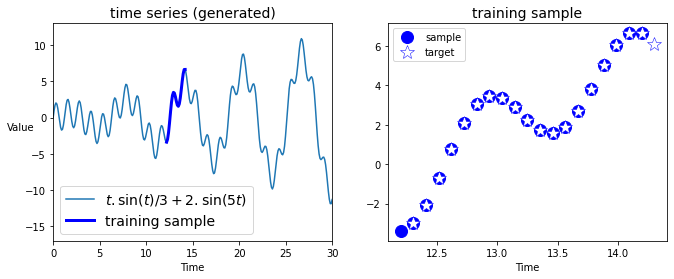

In [4]:
## 샘플데이터 ##

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="training sample")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value", rotation=0)

plt.subplot(122)
plt.title("training sample", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=12, label="sample")
plt.plot(t_instance[1:], time_series(t_instance[1:]), 
         "w*", markeredgewidth=0.5, markeredgecolor="b", markersize=14, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## OutputProjectionWrapper를 사용한 RNN 모델링

![OutputProjectionWrapper](images/OutputProjectionWrapper.png)

셀 래퍼는 보통의 셀과 매우 비슷하게 작동하며 모든 메서도 호출을 감싼 셀로 전달함.
OutputProjectionWrapper는 각 출력의 상단에 (어떤 활성화 함수 없이) 선형 뉴런으로 구성된 완전 연결 층을 추가.
셀의 출력에는 영향을 미치지만 셀의 상태에는 영향을 미치지 않음.(샐 래퍼의 완전 연결 층은 outputs에만 적용되고 states에는 적용 안됨)

In [9]:
## OutputProjectionWrapper 사용 ##

tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

# RNN Model
#basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
basic_cell = tf.contrib.rnn.OutputProjectionWrapper( #각 출력의 상단에 선형 뉴런으로 구성된 완전 연결층 추가
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu),
    output_size=n_outputs
)
outputs, states = tf.nn.dynamic_rnn(basic_cell, inputs, dtype=tf.float32)
# dense layer
logits = tf.layers.dense(states, n_outputs)  #1개의 뉴런으로 된 완전신경망

# loss
#xentropy = tf.reduce_mean(
#    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))
mse = tf.losses.mean_squared_error(labels=labels, predictions=outputs)

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(mse)

################
# Train Params #
################
learning_rate = 0.001
n_epoch = 10000
batch_size = 300

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_epoch):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={inputs: batch_x, labels: batch_y})
        if iteration % 1000 == 0:
            loss = mse.eval(feed_dict={inputs: batch_x, labels: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={inputs: X_new})
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
step: 000, MSE: 15.5452
step: 1000, MSE: 0.1046
step: 2000, MSE: 0.0678
step: 3000, MSE: 0.0551
step: 4000, MSE: 0.0459
step: 5000, MSE: 0.0368
step: 6000, MSE: 0.0359
step: 7000, MSE: 0.0386
step: 8000, MSE: 0.0373
step: 9000, MSE: 0.0342
y_pred:(1, 20, 1)
[[[-3.3690712]
  [-2.4315894]
  [-0.7474268]
  [ 0.66323  ]
  [ 2.1067283]
  [ 3.073393 ]
  [ 3.4223695]
  [ 3.327913 ]
  [ 2.8488598]
  [ 2.2151186]
  [ 1.7143476]
  [ 1.5609294]
  [ 1.8800949]
  [ 2.686378 ]
  [ 3.815561 ]
  [ 5.0317407]
  [ 6.0353937]
  [ 6

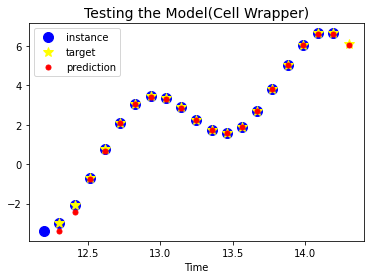

평균오차 : 0.061981


In [11]:
## 예측 데이터 시각화 ##
plt.title("Testing the Model(Cell Wrapper)", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

print(f"평균오차 : {np.mean(np.abs(y_pred[0,:,0] - time_series(t_instance[1:]))):.6f}")

## 셀 레퍼보다 효율적인 RNN 모델링

![timernn](images/timernn.png)

OutputProjectionWrapper는 RNN의 출력 시퀀스 차원을 타임 스텝마다 하나의 값으로 줄이는 가장 간단한 솔루션이지만 효율적이는 않음.
다음은 OutputProjectionWrapper보다 효율적인 방법 과정이다.

<ol>
<li>각 타임 스텝마다 (batch_size, n_neurons) 출력 벡터를 tf.reshape()을 이용해 쌓는다(stack).</li>
    <ol>[배치크기, 스텝, 뉴런개수] → [배치크기 x 스텝, 뉴런개수]</ol>
<li>1개의 유닛을 가지는 Fully-Connected Layer를 적용한다. 이때의 FC Layer는 단지 차원 축소를 위한 레이어이기 때문에 활성화 함수를 사용하지 않는다.</li>
<li>마지막으로, tf.reshape()을 이용해 차원 축소시킨 출력을 다시 타임 스텝별로 풀어준다(unstack).</li>
    <ol>[배치크기 x 스텝, 뉴런개수] → [배치크기, 스텝, 뉴런개수]</ol>
</ol>

In [19]:
## OutputProjectionWrapper 사용안함 ##

tf.reset_default_graph()

n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# RNN Model
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) #셀 래퍼를 사용하지 않는 기본 셀 사용
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# dense layer
# 하나의 출력을 위한 작업
stacked_rnn_outputs = tf.reshape(tensor=rnn_outputs, shape=[-1, n_neurons]) #[배치크기, 스텝, 뉴런개수] → [배치크기 x 스텝, 뉴런개수]
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #뉴런 개수만큼의 출력을 하나의 출력으로 만듬
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #[배치크기 x 스텝, 뉴런개수] → [배치크기, 스텝, 뉴런개수]

################
# Train Params #
################
learning_rate = 0.001
n_iterations = 10000
batch_size = 300

# loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

#Saver
saver = tf.train.Saver()

# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if iteration % 1000 == 0:
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})
    
    #모델 저장
    saver.save(sess, "./my_time_series_model")
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))

step: 000, MSE: 21.0440
step: 1000, MSE: 0.0517
step: 2000, MSE: 0.0452
step: 3000, MSE: 0.0382
step: 4000, MSE: 0.0408
step: 5000, MSE: 0.0389
step: 6000, MSE: 0.0373
step: 7000, MSE: 0.0350
step: 8000, MSE: 0.0347
step: 9000, MSE: 0.0366
y_pred:(1, 20, 1)
[[[-3.3105013]
  [-2.4933732]
  [-0.7979438]
  [ 0.7485072]
  [ 2.094326 ]
  [ 3.0665073]
  [ 3.463848 ]
  [ 3.3567717]
  [ 2.8664312]
  [ 2.225934 ]
  [ 1.7086749]
  [ 1.5650887]
  [ 1.8976834]
  [ 2.7047272]
  [ 3.841031 ]
  [ 5.052713 ]
  [ 6.0638638]
  [ 6.6470766]
  [ 6.6172123]
  [ 6.0505   ]]]


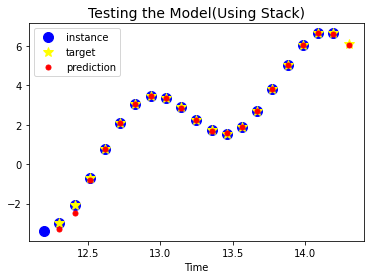

평균오차 : 0.055231


In [20]:
## 예측 데이터 시각화 ##
plt.title("Testing the Model(Using Stack)", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target", color='yellow')
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

print(f"평균오차 : {np.mean(np.abs(y_pred[0,:,0] - time_series(t_instance[1:]))):.6f}")

## RNN의 창조성

모델을 사용해 새로운 시퀀스를 창조할 수 있다.
<ol>
    <li>생성을 위해 필요한 n_steps 값을 가지는 시드 시퀀스(0으로 채워진 시퀀스) 생성.</li>
    <li>예측한 값을 시퀀스 끝에 추가</li>
    <li>마지막 n_steps 값을 모델에 주입하여 다음 값을 예측</li>
</ol>

INFO:tensorflow:Restoring parameters from ./my_time_series_model


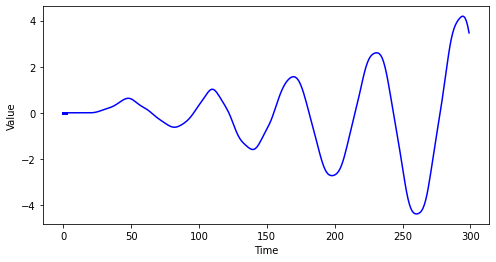

In [31]:
## 새 시퀀스 창조 ##

#새 데이터
sequence = [0. for i in range(n_steps)]
predict_count = 30

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
            
    for iteration in range(len(t) - n_steps):        
        # 새로운 데이터 예측하기
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

INFO:tensorflow:Restoring parameters from ./my_time_series_model


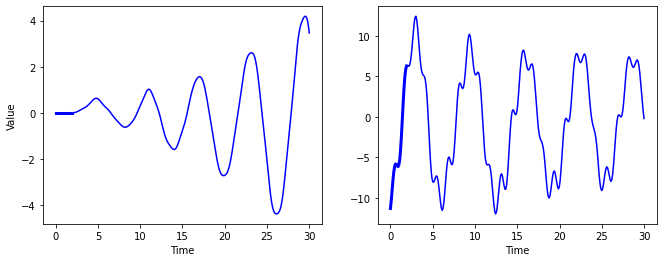

In [28]:
## 새 시퀀스 창조 ##

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")

    sequence1 = [0. for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence1[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence1.append(y_pred[0, -1, 0])

    sequence2 = [time_series(i * resolution + t_min + (t_max-t_min/3)) for i in range(n_steps)]
    for iteration in range(len(t) - n_steps):
        X_batch = np.array(sequence2[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(predictions, feed_dict={X: X_batch})
        sequence2.append(y_pred[0, -1, 0])

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(t, sequence1, "b-")
plt.plot(t[:n_steps], sequence1[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.plot(t, sequence2, "b-")
plt.plot(t[:n_steps], sequence2[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")

plt.show()

# 심층 RNN

셀을 여러 층으로 쌓는 것은 상당히 일반적이여, 이를 심층RNN이라고 한다.

![deepRNN](images/deppRNN.png)

심층RNN을 텐서플로로 구현하려면 여러 개의 셀을 만들어 이를 <b>tf.nn.rnn_cell.MultiRNNCell</b>로 쌓아올려야 함.

In [7]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

layers =[tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu) for _ in range(n_layers)] #심층RNN에 들어갈 여러개의 셀
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers) #여러 개의 셀을 쌓음
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell,
                                     X,
                                     dtype=tf.float32
                                    #state_is_tuple=False #states는 열 방향을 따라 합쳐짐, 각 층의 상태를 담고 있는 하나의 텐서가 됨
                                    )

# Sample data
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: batch_x})
    
print('outputs_val:{}'.format(outputs_val.shape)) #[배치크기, 스텝, 뉴런개수]

outputs_val:(2, 5, 100)


## 여러 GPU에 심층 RNN 분산하기

각기 다른 device() 블록 안에서 셀을 만드는 것은 문제가 된다. <b>tf.nn.rnn_cell.BasicRNNCell</b>는 셀 팩토리이고 셀 자체가 아니기 때문이다.(팩토리를 만들 때 어떤 셀도 생성되지 않으며 아무런 변수도 생성되지 않기때문, 실제 셀은 나중에 <b>tf.nn.dynamic_rnn</b>을 호출할 때 <b>tf.nn.rnn_cell.MultiRNNCell</b>가 호출되고 각 개별적인 <b>tf.nn.rnn_cell.BasicRNNCell</b>이 호출되어 실제 셀을 생성)

In [9]:
tf.reset_default_graph()

with tf.device("/gpu:0"):  # 무시됨!!
    layer1 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

with tf.device("/gpu:1"):  # 무시됨!!
    layer2 = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [11]:
# 자신만의 셀 래퍼를 만들어서 해결
import tensorflow as tf

class DeviceCellWrapper(tf.nn.rnn_cell.RNNCell):
    def __init__(self, device, cell):
        self.__cell = cell
        self.__device = device
        
    @property
    def state_size(self): #단순히 모드 메소드 호출을 대신해 매개변수로 전달된 셀의 메소드를 호출
        return self.__cell.state_size
    
    @property
    def output_size(self):
        return self.__cell.output_size
    
    def __call__(self, inputs, state, scope=None):
        with tf.device(self.__device):
            return self.__cell(inputs, state, scope)

In [12]:
tf.reset_default_graph()

n_inputs = 2
n_steps = 5
n_neurons = 100
n_layers = 3
devices = ["/gpu:0", "/cpu:0", "/gpu:0"] #분산할 장비들

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

cells =[DeviceCellWrapper(dev, tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)) for dev in devices] #심층RNN에 들어갈 여러개의 셀
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells) #여러 개의 셀을 쌓음
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell,
                                     X,
                                     dtype=tf.float32
                                    #state_is_tuple=False #states는 열 방향을 따라 합쳐짐, 각 층의 상태를 담고 있는 하나의 텐서가 됨
                                    )

# Sample data
batch_x = np.random.rand(2, n_steps, n_inputs)  # shape: (2, 5, 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: batch_x})
    
print('outputs_val:{}'.format(outputs_val.shape)) #[배치크기, 스텝, 뉴런개수]

outputs_val:(2, 5, 100)


## 드롭아웃 적용하기

RNN층 사이에 드롭아웃을 적용하려면 <b>tf.nn.rnn_cell.DropoutWrapper</b> 클래스를 사용해야 함.

In [48]:
tf.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# without dropout rate
keep_prob = tf.placeholder_with_default(1.0, shape=()) #드롭아웃 적용 비율
cells = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.nn.rnn_cell.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_iterations = 2000
batch_size = 150
train_keep_prob = 0.5

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss],
                          feed_dict={X: X_batch, y: y_batch,
                                     keep_prob: train_keep_prob})
        if iteration % 200 == 0:                   # not shown in the book
            print(iteration, "Training MSE:", mse) # not shown
            
    #모델 저장
    saver.save(sess, "./my_time_series_dropout_model")

0 Training MSE: 15.643598
200 Training MSE: 3.09241
400 Training MSE: 3.3486283
600 Training MSE: 2.4113882
800 Training MSE: 2.6125576
1000 Training MSE: 2.2060616
1200 Training MSE: 2.4900203
1400 Training MSE: 3.176126
1600 Training MSE: 2.359642
1800 Training MSE: 2.7890553


INFO:tensorflow:Restoring parameters from ./my_time_series_dropout_model


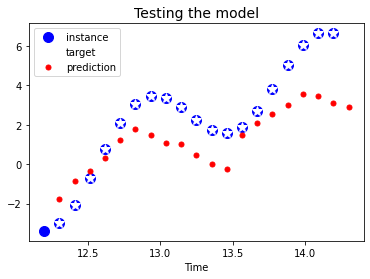

In [50]:
## 데이터 예측 ##

with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_dropout_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

## LSTM 셀

### - 장기 의존성(Long-Term Dependency) 문제

RNN은 타임 스텝 $t$에서 이전 타임 스텝($t-1$)의 상태(state, $h_{t-1}$)를 입력으로 받는 구조이기 때문에, 이전의 정보가 현재의 타임 스텝 $t$에 영향을 줄 수 있다. 따라서, RNN의 순환 뉴런(Reccurent Neurons)의 출력은 이전 타임 스텝의 모든 입력에 대한 함수이므로, 이를 메모리 셀(memory cell)이라고 한다.

이렇듯, RNN은 이론적으로 모든 이전 타임 스텝이 영향을 주지만 앞쪽의 타임 스텝(예를 들어 $t=0, t=1$)은 타임 스텝이 길어질 수록 영향을 주지 못하는 문제가 발생하는데 이를 장기 의존성(Long-Term Dependency) 문제라고 한다. 이러한 문제가 발생하는 이유는 입력 데이터가 RNN Cell을 거치면서 특정 연산을 통해 데이터가 변환되어, 일부 정보는 타임 스텝마다 사라지기 때문이다.

![deepRNN](images/Long-Term_Dependency.png)

이러한 문제를 해결하기 위해 장기간의 메모리를 가질 수 있는 여러 종류의 셀이 만들어졌는데, 그 중에서 대표적인 셀들이 LSTM과 GRU 셀이다. 먼저, LSTM 셀에 대해 알아보도록 하자.

### - LSTM 셀

![lstm](images/lstm.png)

위의 그림에서 보면 LSTM 셀에서는 상태(state)가 두 개의 벡터 $\mathbf{h}_t$와 $\mathbf{c}_t$로 나누어 진다는 것을 알 수 있다. <b style="background-color:#3CC">$\mathbf{h}_t$를 단기 상태(short-term state)</b>, <b style="background-color:#5D5">$\mathbf{c}_t$를 장기 상태(long-term state)</b>라고 볼 수 있다.

위의 LSTM 셀을 자세히 살펴보도록 하자. LSTM의 핵심은 네트워크가 장기 상태($\mathbf{c}_t$)에서 기억할 부분, 삭제할 부분, 그리고 읽어 들일 부분을 학습하는 것이다. 장기 기억 $\mathbf{c}_{t-1}$은 셀의 왼쪽에서 오른쪽으로 통과하게 되는데 forget gate를 지나면서 일부를 기억(정보)을 잃고, 그 다음 덧셈(+) 연산으로 input gate로 부터 새로운 기억 일부를 추가한다. 이렇게 만들어진 $\mathbf{c}_t$는 별도의 추가 연산 없이 바로 출력되며, 이러한 장기 기억 $\mathbf{c}_t$는 타임 스텝마다 일부의 기억을 삭제하고 추가하는 과정을 거치게 된다. 그리고 덧셈 연산 후에 $\mathbf{c}_t$는 복사되어 output gate의 $\tanh$함수로 전달되어 단기 상태 $\mathbf{h}_{t}$와 셀의 출력인 $\mathbf{y}_t$를 만든다. 이번에는 위에서 설명한 forget, input, output 게이트(gate)가 어떻게 작동하는지에 대해 알아보도록 하자.

먼저, 현재 입력 벡터 $\mathbf{x}_{t}$와 이전의 단기 상태 $\mathbf{h}_{t-1}$이 네 개의 다른 FC-레이어(Fully-Connected layer)에 주입되는데, 이 레이어는 모두 다음과 같이 다른 목적을 가진다.

<ul>
주요 레이어는 $\mathbf{g}_t​$를 출력하는 레이어이며, 현재 입력 데이터 $\mathbf{x}_t​$와 이전 타임스텝의 단기 상태 $\mathbf{h}_{t-1}​$을 분석하는 역할을 한다. LSTM 셀에서는 이 레이어의 출력인 $\mathbf{g}_{t}​$가 $\mathbf{i}_{t}​$의 곱셈($\times​$)연산 후 장기 상태 $\mathbf{c}_{t}​$에 일부분이 더해지게 된다. 반면에, 기본 RNN 셀에서는 이 레이어만 있으며, 바로 $\mathbf{y}_{t}​$와 $\mathbf{h}_{t}​$로 출력된다.

$\mathbf{f}_{t}, \mathbf{i}_{t}, \mathbf{o}_{t}$를 출력하는 세 개의 레이어에서는 활성화 함수로 시그모이드(sigmoid, logistic)를 사용한다. 시그모이드 함수의 출력의 범위는 0 ~ 1 이며, 이 출력값은 각 forget, input, output 게이트의 원소별(element-wise) 곱셈연산에 입력된다. 따라서, 출력이 0일 경우에는 게이트를 닫고 1일 경우에는 게이트를 열기 때문에 $\mathbf{f}_{t}, \mathbf{i}_{t}, \mathbf{o}_{t}$를 gate controller라고 한다.
        
#### Forget gate : $\mathbf{f}_{t}$에 의해 제어되며 장기 상태 $\mathbf{c}_{t}$의 어느 부분을 삭제할지 제어한다.
#### Input gate : $\mathbf{i}_{t}$에 의해 제어되며 $\mathbf{g}_{t}$의 어느 부분이 장기 상태 $\mathbf{c}_{t}$에 더해져야 하는지 제어한다.
#### Output gate : $\mathbf{o}_{t}$는 장기 상태 $\mathbf{c}_{t}$의 어느 부분을 읽어서 $\mathbf{h}_{t}$ 와 $\mathbf{y}_{t}$로 출력해야 하는지 제어한다.
</ul>
    
다음의 식은 위의 그림에서 타임 스텝 $t$에서, 셀의 장기 상태, 단기 상태, 그리고 각 레이어의 출력을 구하는 식을 나타낸 것이다.

![lstm](images/lstm_function.svg)

#### $\mathbf{W}_{xf}, \mathbf{W}_{xi}, \mathbf{W}_{xo}, \mathbf{W}_{xg}$ : 입력 벡터 $\mathbf{x}_{t}$에 연결된 네 개의 레이어에 대한 가중치 행렬
#### $\mathbf{W}_{hf}, \mathbf{W}_{hi}, \mathbf{W}_{ho}, \mathbf{W}_{hg}$ : 이전 타임스텝의 단기 상태 $\mathbf{h}_{t-1}$에 연결된 네 개의 레이어에 대한 가중치 행렬
#### $\mathbf{b}_{f}, \mathbf{b}_{i}, \mathbf{b}_{o}, \mathbf{b}_{g}$ : 네 개의 레이어에 대한 편향(bias), 텐서플로(TensorFlow)에서는 #### $\mathbf{b}_{f}$ 를 1로 초기화하여 학습 시작시에 모든것을 잃어버리는 것을 방지한다.

In [61]:
## 텐서플로에서 LSTM셀

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu) #LSTM셀 만들기
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32) #LSTM셀은 셀 상태(c)와 히든 상태(h) 2개의 상태 저장,
                                                                        #state[layer][0] : 셀 상태, state[layer][1] : 히든 상태
top_layer_h_state = states[-1][1]
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)  # states = outputs[-1]

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 5
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
epoch : 000 acc_batch : 0.9267, acc_valid : 0.9364 loss_batch : 0.2297
epoch : 001 acc_batch : 0.9767, acc_valid : 0.9700 loss_batch : 0.1006
epoch : 002 acc_batch : 0.9800, acc_valid : 0.9780 loss_batch : 0.0672
epoch : 003 acc_batch : 0.9833, acc_valid : 0.9834 loss_batch : 0.0592
epoch : 004 acc_batch : 0.9900, acc_valid : 0.9808 loss_batch : 0.0468


## 핍홀 연결

![peephome](images/peephole.png)

기본 LSTM 셀에서 게이트 제어기는 입력 $\mathbf{x}_{t}$와 이전 단기 상태 $\mathbf{h}_{t-1}$만 을 바라 봄.
<br>
게이트 제어기에 장기 상태도 조금 노출시키게 함
<br>
이전 장기 기억 상태 $\mathbf{c}_{t-1}$이 삭제 게이트와 입력 게이트의 제어기 $\mathbf{f}_{t}$와 $\mathbf{i}_{t}$에 입력으로 추가됨.
<br>
현재의 장기 기억 상태 $\mathbf{c}_{t}$는 출력 게이트의 제어기 $\mathbf{o}_{t}$에 입력으로 추가됨.
<br>
LSTM의 변종의 한 종류임

In [62]:
## 텐서플로에서 peephole 연결

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.LSTMCell(num_units=n_neurons, #tf.nn.rnn_cell.BasicLSTMCell 대신 tf.nn.rnn_cell.LSTMCell사용
                                      activation=tf.nn.elu,
                                     use_peepholes=True) #핍홀 연결 구현
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32) #LSTM셀은 셀 상태(c)와 히든 상태(h) 2개의 상태 저장,
                                                                        #state[layer][0] : 셀 상태, state[layer][1] : 히든 상태
top_layer_h_state = states[-1][1]
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)  # states = outputs[-1]

# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 5
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9467, acc_valid : 0.9384 loss_batch : 0.1869
epoch : 001 acc_batch : 0.9533, acc_valid : 0.9642 loss_batch : 0.1235
epoch : 002 acc_batch : 0.9733, acc_valid : 0.9794 loss_batch : 0.0879
epoch : 003 acc_batch : 0.9933, acc_valid : 0.9770 loss_batch : 0.0438
epoch : 004 acc_batch : 0.9933, acc_valid : 0.9816 loss_batch : 0.0329


## GRU 셀

![gru](images/gru.png)

GRU(Gated Recurrent Unit) 셀은 LSTM의 간소화 된 버전이고 유사하게 작동하는 것처럼 보임.

<ul>
    <li>두 상태 벡터가 하나의 벡터 $\mathbf{h}_{t-1}$로 합쳐짐</li>
    <li>
        하나의 게이트 제어가 $\mathbf{z}_{t}$가 삭제 게이트와 입력 게이트를 모두 제어
        <ul>
            <li>게이트 제어기가 1 출력 : 삭제 게이트 열림 & 입력 게이트 닫힘</li>
            <li>게이트 제어기가 0 출력 : 삭제 게이트 닫힘 & 입력 게이트 열림</li>
            ※기억이 저장될 때마다 저장될 위치가 먼저 삭제됨!!
        </ul>
    </li>
    <li>출력 게이트가 없음(전제 상태 벡터가 매 타임 스텝마다 출력됨)</li>
    그 대신 이전 상태의 어느 부분이 출력될지 제어하는 새로운 게이트 제어기 $\mathbf{r}_{t}$이 있음
</ul>

![gru](images/gru_function.svg)

In [65]:
## 텐서플로에서 peephole 연결

tf.reset_default_graph()

inputs = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
labels = tf.placeholder(tf.int32, [None])

# LSTM Model
lstm_cells = [tf.nn.rnn_cell.GRUCell(num_units=n_neurons, #GRu 셀 생성
                                      activation=tf.nn.elu)
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, inputs, dtype=tf.float32)
top_layer_h_state = states[-1] #두 상태벡터가 하나의 상태벡터로 합쳐짐
# dense layer
logits = tf.layers.dense(top_layer_h_state, n_outputs)
# loss
xentropy = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

learning_rate = 0.001
n_epochs = 10
batch_size = 300

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(xentropy)

# metric
correct = tf.nn.in_top_k(logits, labels, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for batch_x, batch_y in shuffle_batch(train_x, train_y, batch_size):
            batch_x = batch_x.reshape([-1, n_steps, n_inputs])
            sess.run(train_op, 
                     feed_dict={inputs: batch_x, labels: batch_y})
        acc_batch = accuracy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        acc_valid = accuracy.eval(feed_dict={inputs: valid_x, labels: valid_y})
        loss_batch = xentropy.eval(feed_dict={inputs: batch_x, labels: batch_y})
        print('epoch : {:03d}'.format(epoch),
              'acc_batch : {:.4f}, acc_valid : {:.4f}'.format(acc_batch, acc_valid),
              'loss_batch : {:.4f}'.format(loss_batch))

epoch : 000 acc_batch : 0.9667, acc_valid : 0.9678 loss_batch : 0.1089
epoch : 001 acc_batch : 0.9833, acc_valid : 0.9778 loss_batch : 0.0460
epoch : 002 acc_batch : 0.9833, acc_valid : 0.9780 loss_batch : 0.0368
epoch : 003 acc_batch : 0.9867, acc_valid : 0.9852 loss_batch : 0.0570
epoch : 004 acc_batch : 0.9900, acc_valid : 0.9890 loss_batch : 0.0320
epoch : 005 acc_batch : 0.9900, acc_valid : 0.9872 loss_batch : 0.0257
epoch : 006 acc_batch : 0.9967, acc_valid : 0.9882 loss_batch : 0.0134
epoch : 007 acc_batch : 0.9967, acc_valid : 0.9896 loss_batch : 0.0066
epoch : 008 acc_batch : 0.9967, acc_valid : 0.9908 loss_batch : 0.0046
epoch : 009 acc_batch : 0.9933, acc_valid : 0.9906 loss_batch : 0.0089


## 자연어 처리

### 워드 임베딩

In [1]:
#임베딩 된 데이터 가져오기

from six.moves import urllib

import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    """Create directories, ok if they already exist.
    
    This is for python 2 support. In python >=3.2, simply use:
    >>> os.makedirs(path, exist_ok=True)
    """
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [3]:
#가져온 단어 확인

words = fetch_words_data()
print(f"단어 목록 크기 : {len(words)}")
print(words[:5])

단어 목록 크기 : 17005207
['anarchism', 'originated', 'as', 'a', 'term']


In [7]:
#임베딩 하기

from collections import Counter

vocabulary_size = 100000

vocabulary = [("UNK", None)] + Counter(words).most_common(vocabulary_size - 1) #데이터 내의 단어의 개수를 셈, UNK는 알수없는 문자열 처리
vocabulary = np.array([word for word, _ in vocabulary]) #중복되는 단어를 없앰
dictionary = {word: code for code, word in enumerate(vocabulary)} #단어를 중복없이 저장
data = np.array([dictionary.get(word, 0) for word in words])

TypeError: 'dict_keys' object is not subscriptable

In [18]:
## 단어 확인 ##

print(" ".join(words[:9]), data[:9]) #anarchism originated as a term of abuse first used [5234 3081   12    6  195    2 3134   46   59]


print(" ".join([vocabulary[word_index] for word_index in [5241, 3081, 12, 6, 195, 2, 3134, 46, 59]])) #cycles originated as a term of abuse first used

print(words[24], data[24]) #culottes 58113

anarchism originated as a term of abuse first used [5234 3081   12    6  195    2 3134   46   59]
cycles originated as a term of abuse first used
culottes 58113


In [19]:
## 배치 생성 ##
from collections import deque

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=[batch_size], dtype=np.int32)
    labels = np.ndarray(shape=[batch_size, 1], dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = np.random.randint(0, span)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

In [20]:
np.random.seed(42)
data_index = 0
batch, labels = generate_batch(8, 2, 1)

print(batch, [vocabulary[word] for word in batch])
print(labels, [vocabulary[word] for word in labels[:, 0]])

[3081 3081   12   12    6    6  195  195] ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
[[  12]
 [5234]
 [   6]
 [3081]
 [  12]
 [ 195]
 [   2]
 [   6]] ['as', 'anarchism', 'a', 'originated', 'as', 'term', 'of', 'a']


## 모델 빌드

In [21]:
batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)
num_sampled = 64    # Number of negative examples to sample.

learning_rate = 0.01

In [22]:
tf.reset_default_graph()

# Input data.
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

vocabulary_size = 100000
embedding_size = 150

# Look up embeddings for inputs.
init_embeds = tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0)
embeddings = tf.Variable(init_embeds)

train_inputs = tf.placeholder(tf.int32, shape=[None])
embed = tf.nn.embedding_lookup(embeddings, train_inputs)

# Construct the variables for the NCE loss
nce_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                        stddev=1.0 / np.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

# Compute the average NCE loss for the batch.
# tf.nce_loss automatically draws a new sample of the negative labels each
# time we evaluate the loss.
loss = tf.reduce_mean(
    tf.nn.nce_loss(nce_weights, nce_biases, train_labels, embed,
                   num_sampled, vocabulary_size))

# Construct the Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

# Compute the cosine similarity between minibatch examples and all embeddings.
norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), axis=1, keepdims=True))
normalized_embeddings = embeddings / norm
valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

In [23]:
#Training

num_steps = 10001

with tf.Session() as session:
    session.run(tf.global_variables_initializer())

    average_loss = 0
    for step in range(num_steps):
        print("\rIteration: {}".format(step), end="\t")
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

        # We perform one update step by evaluating the training op (including it
        # in the list of returned values for session.run()
        _, loss_val = session.run([training_op, loss], feed_dict=feed_dict)
        average_loss += loss_val

        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print("Average loss at step ", step, ": ", average_loss)
            average_loss = 0

        # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = vocabulary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log_str = "Nearest to %s:" % valid_word
                for k in range(top_k):
                    close_word = vocabulary[nearest[k]]
                    log_str = "%s %s," % (log_str, close_word)
                print(log_str)

    final_embeddings = normalized_embeddings.eval()
    
#Save Model Using numpy
np.save("./my_final_embeddings.npy", final_embeddings)

Iteration: 0	Average loss at step  0 :  344.1524658203125
Nearest to over: ipo, cairo, flipped, longifolia, bx, abbreviate, panting, reveries,
Nearest to one: spreadsheets, wikis, sloe, dso, twelve, populi, missal, mahindra,
Nearest to were: sarangani, kha, mensa, abductions, mueller, downing, gatorade, evenly,
Nearest to may: lewontin, supermodel, strangers, precious, plancherel, scalawags, dresser, seppuku,
Nearest to two: barnave, tequila, idios, genealogies, viracocha, preservation, berniece, electrochemical,
Nearest to its: seinen, faa, foamy, brereton, franck, telepathic, kamouflage, kingman,
Nearest to than: appenzeller, neto, mcfarland, anic, projet, kleine, thrushes, musicum,
Nearest to these: hatters, broker, halicz, murrow, goyder, offspring, brigadists, boulle,
Nearest to they: bodo, scienter, troubadors, obiang, ji, gowon, instantiation, changewinds,
Nearest to is: deeded, lleyton, glacially, morissette, ofdm, buzzing, cook, aurel,
Nearest to up: boxen, hautes, expatriates

In [13]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

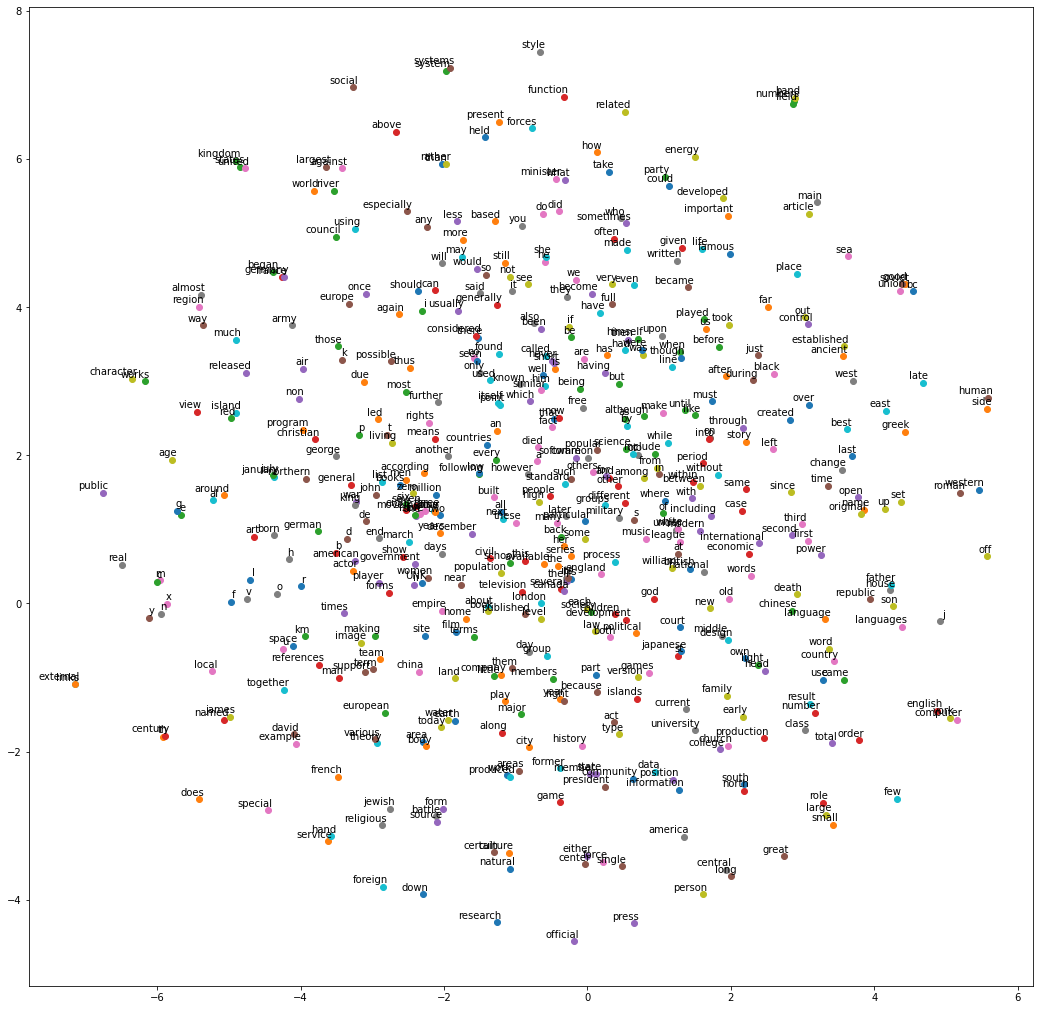

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only,:])
labels = [vocabulary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## 기계번역

basic_rnn_seq2seq()은 간단한 인코더/디코더 모델을 만든다.

In [25]:
import tensorflow as tf

tf.reset_default_graph()

n_steps = 50
n_neurons = 200
n_layers = 3
num_encoder_symbols = 20000
num_decoder_symbols = 20000
embedding_size = 150
learning_rate = 0.01

X = tf.placeholder(tf.int32, [None, n_steps]) # English sentences
Y = tf.placeholder(tf.int32, [None, n_steps]) # French translations
W = tf.placeholder(tf.float32, [None, n_steps - 1, 1])
Y_input = Y[:, :-1]
Y_target = Y[:, 1:]

encoder_inputs = tf.unstack(tf.transpose(X)) # list of 1D tensors
decoder_inputs = tf.unstack(tf.transpose(Y_input)) # list of 1D tensors

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)

output_seqs, states = tf.contrib.legacy_seq2seq.embedding_rnn_seq2seq(
    encoder_inputs,
    decoder_inputs,
    cell,
    num_encoder_symbols,
    num_decoder_symbols,
    embedding_size)

logits = tf.transpose(tf.unstack(output_seqs), perm=[1, 0, 2])

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype arg

In [26]:
logits_flat = tf.reshape(logits, [-1, num_decoder_symbols])
Y_target_flat = tf.reshape(Y_target, [-1])
W_flat = tf.reshape(W, [-1])
xentropy = W_flat * tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y_target_flat, logits=logits_flat)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()